In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load data from csv 
trial1_results = pd.read_csv('CNN_WithTime_Offset_1_Trial_1.csv', header=0)
trial2_results = pd.read_csv('CNN_WithTime_Offset_1_Trial_2.csv', header=0)
trial3_results = pd.read_csv('CNN_WithTime_Offset_1_Trial_3.csv', header=0)

In [3]:
trial1_results

,Timestep,State,Current RUL,Cummulative Reward
0,1.0,0.0,10.0000,0.0
1,2.0,0.0,10.0000,1000.0
2,3.0,0.0,10.0000,2000.0
3,4.0,9.0,10.0000,1000.0
4,5.0,9.0,10.0000,0.0
...,...,...,...,...
3001,3002.0,3.0,5.0320,655100.0
3002,3003.0,3.0,3.7314,655600.0
3003,3004.0,7.0,3.7314,655100.0
3004,3005.0,2.0,3.7314,655900.0


In [4]:
trial2_results

,Timestep,State,Current RUL,Cummulative Reward
0,1.0,0.0,10.0000,0.0
1,2.0,0.0,10.0000,1000.0
2,3.0,1.0,10.0000,1900.0
3,4.0,1.0,6.7253,2800.0
4,5.0,1.0,5.7798,3700.0
...,...,...,...,...
3001,3002.0,1.0,5.5359,658900.0
3002,3003.0,1.0,5.5359,659800.0
3003,3004.0,1.0,4.6293,660700.0
3004,3005.0,5.0,4.6293,660200.0


In [5]:
trial3_results

,Timestep,State,Current RUL,Cummulative Reward
0,1.0,0.0,10.0000,0.0
1,2.0,0.0,10.0000,1000.0
2,3.0,0.0,10.0000,2000.0
3,4.0,0.0,6.4309,3000.0
4,5.0,0.0,5.8838,4000.0
...,...,...,...,...
3001,3002.0,0.0,1.8182,570900.0
3002,3003.0,0.0,1.8182,571900.0
3003,3004.0,0.0,1.8182,572900.0
3004,3005.0,1.0,1.8303,573800.0


## Analyse per timestep rewards

In [6]:
timeStop = 3000

In [7]:
trial1_rewards = trial1_results['Cummulative Reward'].tolist()
trial1_rewards = trial1_rewards[:timeStop]

In [8]:
trial2_rewards = trial2_results['Cummulative Reward'].tolist()
trial2_rewards = trial2_rewards[:timeStop]

In [9]:
trial3_rewards = trial3_results['Cummulative Reward'].tolist()
trial3_rewards = trial3_rewards[:timeStop]

In [10]:
data = {'Trial 1': trial1_rewards, 'Trial 2': trial2_rewards, 'Trial 3': trial3_rewards}
rewards_DF = pd.DataFrame(data=data)
rewards_DF

,Trial 1,Trial 2,Trial 3
0,0.0,0.0,0.0
1,1000.0,1000.0,1000.0
2,2000.0,1900.0,2000.0
3,1000.0,2800.0,3000.0
4,0.0,3700.0,4000.0
...,...,...,...
2995,653800.0,656500.0,566500.0
2996,654300.0,657300.0,567500.0
2997,653800.0,658100.0,568500.0
2998,653300.0,657600.0,569500.0


In [11]:
rewards_DF['mean'] = rewards_DF.mean(axis=1)
rewards_DF

,Trial 1,Trial 2,Trial 3,mean
0,0.0,0.0,0.0,0.000000
1,1000.0,1000.0,1000.0,1000.000000
2,2000.0,1900.0,2000.0,1966.666667
3,1000.0,2800.0,3000.0,2266.666667
4,0.0,3700.0,4000.0,2566.666667
...,...,...,...,...
2995,653800.0,656500.0,566500.0,625600.000000
2996,654300.0,657300.0,567500.0,626366.666667
2997,653800.0,658100.0,568500.0,626800.000000
2998,653300.0,657600.0,569500.0,626800.000000


In [12]:
rewards_DF['Standard Deviation'] = rewards_DF[['Trial 1','Trial 2', 'Trial 3']].std(axis=1)
rewards_DF

,Trial 1,Trial 2,Trial 3,mean,Standard Deviation
0,0.0,0.0,0.0,0.000000,0.000000
1,1000.0,1000.0,1000.0,1000.000000,0.000000
2,2000.0,1900.0,2000.0,1966.666667,57.735027
3,1000.0,2800.0,3000.0,2266.666667,1101.514109
4,0.0,3700.0,4000.0,2566.666667,2227.853975
...,...,...,...,...,...
2995,653800.0,656500.0,566500.0,625600.000000,51199.902344
2996,654300.0,657300.0,567500.0,626366.666667,51002.091460
2997,653800.0,658100.0,568500.0,626800.000000,50535.037350
2998,653300.0,657600.0,569500.0,626800.000000,49669.809744


In [13]:
rewards_upper = []
rewards_lower = []
for index, row in rewards_DF.iterrows():
    meanReward = row['mean']
    stdev = row['Standard Deviation']
    maxReward = meanReward + stdev
    rewards_upper.append(maxReward)
    minReward = meanReward - stdev
    rewards_lower.append(minReward)

In [14]:
rewards_mean = rewards_DF['mean'].tolist()
rewards_mean

[0.0,
 1000.0,
 1966.6666666666667,
 2266.6666666666665,
 2566.6666666666665,
 2866.6666666666665,
 2200.0,
 2033.3333333333333,
 1833.3333333333333,
 1600.0,
 1766.6666666666667,
 2266.6666666666665,
 3166.6666666666665,
 4000.0,
 4366.666666666667,
 5233.333333333333,
 5566.666666666667,
 6033.333333333333,
 6933.333333333333,
 7333.333333333333,
 8200.0,
 8533.333333333334,
 9000.0,
 9866.666666666666,
 10233.333333333334,
 11100.0,
 11533.333333333334,
 11533.333333333334,
 12466.666666666666,
 12833.333333333334,
 13700.0,
 14333.333333333334,
 14300.0,
 14700.0,
 15066.666666666666,
 15433.333333333334,
 16200.0,
 16500.0,
 16433.333333333332,
 16800.0,
 17066.666666666668,
 17200.0,
 16166.666666666666,
 15133.333333333334,
 14066.666666666666,
 12566.666666666666,
 11066.666666666666,
 9566.666666666666,
 8533.333333333334,
 7466.666666666667,
 7733.333333333333,
 7900.0,
 7700.0,
 7900.0,
 8100.0,
 8200.0,
 7966.666666666667,
 7733.333333333333,
 7500.0,
 7166.666666666667,
 6

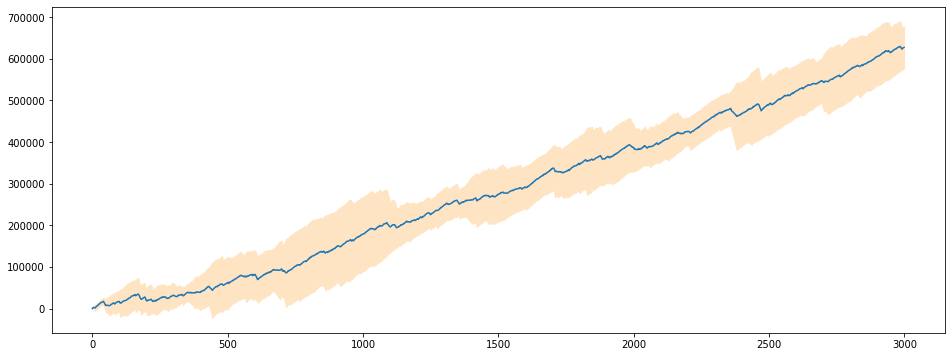

In [15]:
#plot graph 
x = [i for i in range(timeStop)]
plt.figure(figsize=(16, 6))
plt.plot(x, rewards_mean)
plt.fill_between(x, rewards_upper, rewards_lower, color='bisque')
plt.show()

## Analyse number of failure and maintenance instances

In [16]:
trial1_states = trial1_results['State'].tolist()
trial1_states = trial1_states[:3000]
trial1_states

[0.0,
 0.0,
 0.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 0.0,
 1.0,
 2.0,
 2.0,
 2.0,
 3.0,
 7.0,
 2.0,
 2.0,
 2.0,
 3.0,
 7.0,
 2.0,
 2.0,
 2.0,
 2.0,
 6.0,
 1.0,
 2.0,
 2.0,
 3.0,
 7.0,
 7.0,
 2.0,
 2.0,
 2.0,
 3.0,
 7.0,
 7.0,
 2.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 0.0,
 1.0,
 1.0,
 2.0,
 6.0,
 1.0,
 2.0,
 3.0,
 3.0,
 7.0,
 2.0,
 2.0,
 3.0,
 3.0,
 7.0,
 2.0,
 2.0,
 2.0,
 3.0,
 7.0,
 7.0,
 2.0,
 2.0,
 2.0,
 3.0,
 7.0,
 7.0,
 2.0,
 2.0,
 2.0,
 3.0,
 7.0,
 2.0,
 3.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 2.0,
 6.0,
 1.0,
 1.0,
 2.0,
 2.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 1.0,
 1.0,
 1.0,
 1.0,
 5.0,
 0.0,
 0.0,
 9.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 4.0,
 0.0,
 0.0,
 0.0,
 0.0,
 4.0,
 0.0,
 1.0,
 2.0,
 3.0,
 7.0,
 2.0,
 2.0,
 3.0,
 3.0,
 7.0,
 2.0,
 3.0,
 8.0,
 8.0,
 8.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0

In [17]:
def findNumEpisodes(stateList):
    previousState = stateList[0]
    currentState = stateList[0]
    endIndexes = []
    for order in range(len(stateList)):
        currentState = stateList[order]
        
        #check for failure
        if (currentState == 0) and (previousState > 7):
            endIndexes.append(order - 1)
            
        previousState = stateList[order]
    return len(endIndexes)

In [18]:
trial1_numEpisodes = findNumEpisodes(trial1_states)
trial1_numEpisodes

51

In [19]:
def findIndexesOfState(state, dataDF):
    stateIndexes = []
    for index, row in dataDF.iterrows():
        currentState = row['State']
        if currentState == state:
            timestep = row['Timestep']
            stateIndexes.append(timestep)
    return stateIndexes

In [20]:
trial1_results = trial1_results[:3000]
trial1_results

,Timestep,State,Current RUL,Cummulative Reward
0,1.0,0.0,10.0000,0.0
1,2.0,0.0,10.0000,1000.0
2,3.0,0.0,10.0000,2000.0
3,4.0,9.0,10.0000,1000.0
4,5.0,9.0,10.0000,0.0
...,...,...,...,...
2995,2996.0,3.0,5.9953,653800.0
2996,2997.0,3.0,5.0320,654300.0
2997,2998.0,7.0,5.0320,653800.0
2998,2999.0,7.0,5.0320,653300.0


In [21]:
trial1_state8_indexes = findIndexesOfState(8, trial1_results)
trial1_state8_indexes

[100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 159.0,
 160.0,
 161.0,
 332.0,
 333.0,
 334.0,
 335.0,
 336.0,
 609.0,
 964.0,
 965.0,
 966.0,
 1089.0,
 1090.0,
 1091.0,
 1092.0,
 1093.0,
 1094.0,
 1095.0,
 1096.0,
 1097.0,
 1098.0,
 1099.0,
 1100.0,
 1101.0,
 1102.0,
 1119.0,
 1120.0,
 1121.0,
 1122.0,
 1123.0,
 1124.0,
 1348.0,
 1349.0,
 1350.0,
 1351.0,
 1352.0,
 1353.0,
 1354.0,
 1355.0,
 1356.0,
 1357.0,
 1420.0,
 1421.0,
 1422.0,
 1423.0,
 1454.0,
 1455.0,
 1466.0,
 1467.0,
 1468.0,
 1469.0,
 1470.0,
 1553.0,
 1554.0,
 1847.0,
 1848.0,
 1849.0,
 1850.0,
 1851.0,
 1879.0,
 1880.0,
 1881.0,
 1882.0,
 1883.0,
 1884.0,
 1885.0,
 1970.0,
 2020.0,
 2021.0,
 2022.0,
 2157.0,
 2241.0,
 2385.0,
 2462.0,
 2463.0,
 2464.0,
 2465.0,
 2466.0,
 2467.0,
 2468.0,
 2469.0,
 2470.0,
 2471.0,
 2472.0,
 2573.0,
 2574.0,
 2575.0,
 2762.0,
 2763.0,
 2764.0,
 2765.0,
 2845.0,
 2846.0,
 2847.0,
 2945.0,
 2946.0,
 2947.0,
 2948.0,
 2949.0,
 2950.0,
 2987.0,
 2988.0,
 2989.0,
 2990.0,
 2991.0,
 2992.0]

In [22]:
def findNumInstancesInState(stateIndexes):
    previousIndex = stateIndexes[0]
    stateCount = 0
    for i in stateIndexes:
        if i - previousIndex > 1:
            stateCount += 1
        previousIndex = i
    return stateCount

In [23]:
trial1_state8_instanceCount = findNumInstancesInState(trial1_state8_indexes)
trial1_state8_instanceCount

24

In [24]:
#state 8

#trial1
trial1_results = trial1_results[:3000]
trial1_state8_indexes = findIndexesOfState(8, trial1_results)
trial1_state8_instanceCount = findNumInstancesInState(trial1_state8_indexes)
print("Number of instances in trial1 in state 8: %d" % trial1_state8_instanceCount)

#trial2
trial2_results = trial2_results[:3000]
trial2_state8_indexes = findIndexesOfState(8, trial2_results)
trial2_state8_instanceCount = findNumInstancesInState(trial2_state8_indexes)
print("Number of instances in trial2 in state 8: %d" % trial2_state8_instanceCount)

#trial3
trial3_results = trial3_results[:3000]
trial3_state8_indexes = findIndexesOfState(8, trial3_results)
trial3_state8_instanceCount = findNumInstancesInState(trial3_state8_indexes)
print("Number of instances in trial1 in state 8: %d" % trial3_state8_instanceCount)

average_state8_instanceCount = (trial1_state8_instanceCount + trial2_state8_instanceCount + trial3_state8_instanceCount)/3
print(f"Average number of instances in state 8: {average_state8_instanceCount}")

Number of instances in trial1 in state 8: 24
Number of instances in trial2 in state 8: 36
Number of instances in trial1 in state 8: 22
Average number of instances in state 8: 27.333333333333332


In [25]:
#state 9

#trial1
trial1_state9_indexes = findIndexesOfState(9, trial1_results)
trial1_state9_instanceCount = findNumInstancesInState(trial1_state9_indexes)
print("Number of instances in trial1 in state 9: %d" % trial1_state9_instanceCount)

#trial2
trial2_state9_indexes = findIndexesOfState(9, trial2_results)
trial2_state9_instanceCount = findNumInstancesInState(trial2_state9_indexes)
print("Number of instances in trial2 in state 9: %d" % trial2_state9_instanceCount)

#trial3
trial3_state9_indexes = findIndexesOfState(9, trial3_results)
trial3_state9_instanceCount = findNumInstancesInState(trial3_state9_indexes)
print("Number of instances in trial1 in state 9: %d" % trial3_state9_instanceCount)

average_state9_instanceCount = (trial1_state9_instanceCount + trial2_state9_instanceCount + trial3_state9_instanceCount)/3
print(f"Average number of instances in state 9: {average_state9_instanceCount}")

Number of instances in trial1 in state 9: 25
Number of instances in trial2 in state 9: 20
Number of instances in trial1 in state 9: 27
Average number of instances in state 9: 24.0


## Analyse percentage of time in each state

In [26]:
#state 0

#trial1
trial1_state0_indexes = findIndexesOfState(0, trial1_results)
trial1_state0_count = len(trial1_state0_indexes)
trial1_state0_percentage = trial1_state0_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (0, trial1_state0_count, trial1_state0_percentage))

#trial2
trial2_state0_indexes = findIndexesOfState(0, trial2_results)
trial2_state0_count = len(trial2_state0_indexes)
trial2_state0_percentage = trial2_state0_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (0, trial2_state0_count, trial2_state0_percentage))

#trial3
trial3_state0_indexes = findIndexesOfState(0, trial3_results)
trial3_state0_count = len(trial3_state0_indexes)
trial3_state0_percentage = trial3_state0_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (0, trial3_state0_count, trial3_state0_percentage))

#average 
average_state0_count = (trial1_state0_count + trial2_state0_count + trial3_state0_count)/3
average_state0_percentage = average_state0_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (0, average_state0_count, average_state0_percentage))

Machine is in state 0 for 605 timesteps 0.2017 percentage of time in trial 1
Machine is in state 0 for 564 timesteps 0.1880 percentage of time in trial 2
Machine is in state 0 for 523 timesteps 0.1743 percentage of time in trial 3
Machine is in state 0 for 564.0000 timesteps 0.1880 percentage of time on average


In [27]:
#state 1

#trial1
trial1_state1_indexes = findIndexesOfState(1, trial1_results)
trial1_state1_count = len(trial1_state1_indexes)
trial1_state1_percentage = trial1_state1_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (1, trial1_state1_count, trial1_state1_percentage))

#trial2
trial2_state1_indexes = findIndexesOfState(1, trial2_results)
trial2_state1_count = len(trial2_state1_indexes)
trial2_state1_percentage = trial2_state1_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (1, trial2_state1_count, trial2_state1_percentage))

#trial3
trial3_state1_indexes = findIndexesOfState(1, trial3_results)
trial3_state1_count = len(trial3_state1_indexes)
trial3_state1_percentage = trial3_state1_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (1, trial3_state1_count, trial3_state1_percentage))

#average 
average_state1_count = (trial1_state1_count + trial2_state1_count + trial3_state1_count)/3
average_state1_percentage = average_state1_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (1, average_state1_count, average_state1_percentage))

Machine is in state 1 for 638 timesteps 0.2127 percentage of time in trial 1
Machine is in state 1 for 607 timesteps 0.2023 percentage of time in trial 2
Machine is in state 1 for 600 timesteps 0.2000 percentage of time in trial 3
Machine is in state 1 for 615.0000 timesteps 0.2050 percentage of time on average


In [28]:
#state 2

#trial1
trial1_state2_indexes = findIndexesOfState(2, trial1_results)
trial1_state2_count = len(trial1_state2_indexes)
trial1_state2_percentage = trial1_state2_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (2, trial1_state2_count, trial1_state2_percentage))

#trial2
trial2_state2_indexes = findIndexesOfState(2, trial2_results)
trial2_state2_count = len(trial2_state2_indexes)
trial2_state2_percentage = trial2_state2_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (2, trial2_state2_count, trial2_state2_percentage))

#trial3
trial3_state2_indexes = findIndexesOfState(2, trial3_results)
trial3_state2_count = len(trial3_state2_indexes)
trial3_state2_percentage = trial3_state2_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (2, trial3_state2_count, trial3_state2_percentage))

#average 
average_state2_count = (trial1_state2_count + trial2_state2_count + trial3_state2_count)/3
average_state2_percentage = average_state2_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (2, average_state2_count, average_state2_percentage))

Machine is in state 2 for 453 timesteps 0.1510 percentage of time in trial 1
Machine is in state 2 for 526 timesteps 0.1753 percentage of time in trial 2
Machine is in state 2 for 513 timesteps 0.1710 percentage of time in trial 3
Machine is in state 2 for 497.3333 timesteps 0.1658 percentage of time on average


In [29]:
#state 3

#trial1
trial1_state3_indexes = findIndexesOfState(3, trial1_results)
trial1_state3_count = len(trial1_state3_indexes)
trial1_state3_percentage = trial1_state3_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (3, trial1_state3_count, trial1_state3_percentage))

#trial2
trial2_state3_indexes = findIndexesOfState(3, trial2_results)
trial2_state3_count = len(trial2_state3_indexes)
trial2_state3_percentage = trial2_state3_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (3, trial2_state3_count, trial2_state3_percentage))

#trial3
trial3_state3_indexes = findIndexesOfState(3, trial3_results)
trial3_state3_count = len(trial3_state3_indexes)
trial3_state3_percentage = trial3_state3_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (3, trial3_state3_count, trial3_state3_percentage))

#average 
average_state3_count = (trial1_state3_count + trial2_state3_count + trial3_state3_count)/3
average_state3_percentage = average_state3_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (3, average_state3_count, average_state3_percentage))

Machine is in state 3 for 155 timesteps 0.0517 percentage of time in trial 1
Machine is in state 3 for 198 timesteps 0.0660 percentage of time in trial 2
Machine is in state 3 for 211 timesteps 0.0703 percentage of time in trial 3
Machine is in state 3 for 188.0000 timesteps 0.0627 percentage of time on average


In [30]:
#state 4

#trial1
trial1_state4_indexes = findIndexesOfState(4, trial1_results)
trial1_state4_count = len(trial1_state4_indexes)
trial1_state4_percentage = trial1_state4_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (4, trial1_state4_count, trial1_state4_percentage))

#trial2
trial2_state4_indexes = findIndexesOfState(4, trial2_results)
trial2_state4_count = len(trial2_state4_indexes)
trial2_state4_percentage = trial2_state4_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (4, trial2_state4_count, trial2_state4_percentage))

#trial3
trial3_state4_indexes = findIndexesOfState(4, trial3_results)
trial3_state4_count = len(trial3_state4_indexes)
trial3_state4_percentage = trial3_state4_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (4, trial3_state4_count, trial3_state4_percentage))

#average 
average_state4_count = (trial1_state4_count + trial2_state4_count + trial3_state4_count)/3
average_state4_percentage = average_state4_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (4, average_state4_count, average_state4_percentage))

Machine is in state 4 for 105 timesteps 0.0350 percentage of time in trial 1
Machine is in state 4 for 95 timesteps 0.0317 percentage of time in trial 2
Machine is in state 4 for 86 timesteps 0.0287 percentage of time in trial 3
Machine is in state 4 for 95.3333 timesteps 0.0318 percentage of time on average


In [31]:
#state 5

#trial1
trial1_state5_indexes = findIndexesOfState(5, trial1_results)
trial1_state5_count = len(trial1_state5_indexes)
trial1_state5_percentage = trial1_state5_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (5, trial1_state5_count, trial1_state5_percentage))

#trial2
trial2_state5_indexes = findIndexesOfState(5, trial2_results)
trial2_state5_count = len(trial2_state5_indexes)
trial2_state5_percentage = trial2_state5_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (5, trial2_state5_count, trial2_state5_percentage))

#trial3
trial3_state5_indexes = findIndexesOfState(5, trial3_results)
trial3_state5_count = len(trial3_state5_indexes)
trial3_state5_percentage = trial3_state5_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (5, trial3_state5_count, trial3_state5_percentage))

#average 
average_state5_count = (trial1_state5_count + trial2_state5_count + trial3_state5_count)/3
average_state5_percentage = average_state5_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (5, average_state5_count, average_state5_percentage))

Machine is in state 5 for 270 timesteps 0.0900 percentage of time in trial 1
Machine is in state 5 for 217 timesteps 0.0723 percentage of time in trial 2
Machine is in state 5 for 228 timesteps 0.0760 percentage of time in trial 3
Machine is in state 5 for 238.3333 timesteps 0.0794 percentage of time on average


In [32]:
#state 6

#trial1
trial1_state6_indexes = findIndexesOfState(6, trial1_results)
trial1_state6_count = len(trial1_state6_indexes)
trial1_state6_percentage = trial1_state6_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (6, trial1_state6_count, trial1_state6_percentage))

#trial2
trial2_state6_indexes = findIndexesOfState(6, trial2_results)
trial2_state6_count = len(trial2_state6_indexes)
trial2_state6_percentage = trial2_state6_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (6, trial2_state6_count, trial2_state6_percentage))

#trial3
trial3_state6_indexes = findIndexesOfState(6, trial3_results)
trial3_state6_count = len(trial3_state6_indexes)
trial3_state6_percentage = trial3_state6_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (6, trial3_state6_count, trial3_state6_percentage))

#average 
average_state6_count = (trial1_state6_count + trial2_state6_count + trial3_state6_count)/3
average_state6_percentage = average_state6_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (6, average_state6_count, average_state6_percentage))

Machine is in state 6 for 284 timesteps 0.0947 percentage of time in trial 1
Machine is in state 6 for 280 timesteps 0.0933 percentage of time in trial 2
Machine is in state 6 for 266 timesteps 0.0887 percentage of time in trial 3
Machine is in state 6 for 276.6667 timesteps 0.0922 percentage of time on average


In [33]:
#state 7

#trial1
trial1_state7_indexes = findIndexesOfState(7, trial1_results)
trial1_state7_count = len(trial1_state7_indexes)
trial1_state7_percentage = trial1_state7_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (7, trial1_state7_count, trial1_state7_percentage))

#trial2
trial2_state7_indexes = findIndexesOfState(7, trial2_results)
trial2_state7_count = len(trial2_state7_indexes)
trial2_state7_percentage = trial2_state7_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (7, trial2_state7_count, trial2_state7_percentage))

#trial3
trial3_state7_indexes = findIndexesOfState(7, trial3_results)
trial3_state7_count = len(trial3_state7_indexes)
trial3_state7_percentage = trial3_state7_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (7, trial3_state7_count, trial3_state7_percentage))

#average 
average_state7_count = (trial1_state7_count + trial2_state7_count + trial3_state7_count)/3
average_state7_percentage = average_state7_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (7, average_state7_count, average_state7_percentage))

Machine is in state 7 for 163 timesteps 0.0543 percentage of time in trial 1
Machine is in state 7 for 186 timesteps 0.0620 percentage of time in trial 2
Machine is in state 7 for 223 timesteps 0.0743 percentage of time in trial 3
Machine is in state 7 for 190.6667 timesteps 0.0636 percentage of time on average


In [34]:
#state 8

#trial1
trial1_state8_indexes = findIndexesOfState(8, trial1_results)
trial1_state8_count = len(trial1_state8_indexes)
trial1_state8_percentage = trial1_state8_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (8, trial1_state8_count, trial1_state8_percentage))

#trial2
trial2_state8_indexes = findIndexesOfState(8, trial2_results)
trial2_state8_count = len(trial2_state8_indexes)
trial2_state8_percentage = trial2_state8_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (8, trial2_state8_count, trial2_state8_percentage))

#trial3
trial3_state8_indexes = findIndexesOfState(8, trial3_results)
trial3_state8_count = len(trial3_state8_indexes)
trial3_state8_percentage = trial3_state8_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (8, trial3_state8_count, trial3_state8_percentage))

#average 
average_state8_count = (trial1_state8_count + trial2_state8_count + trial3_state8_count)/3
average_state8_percentage = average_state8_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (8, average_state8_count, average_state8_percentage))

Machine is in state 8 for 113 timesteps 0.0377 percentage of time in trial 1
Machine is in state 8 for 128 timesteps 0.0427 percentage of time in trial 2
Machine is in state 8 for 128 timesteps 0.0427 percentage of time in trial 3
Machine is in state 8 for 123.0000 timesteps 0.0410 percentage of time on average


In [35]:
#state 9

#trial1
trial1_state9_indexes = findIndexesOfState(9, trial1_results)
trial1_state9_count = len(trial1_state9_indexes)
trial1_state9_percentage = trial1_state9_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (9, trial1_state9_count, trial1_state9_percentage))

#trial2
trial2_state9_indexes = findIndexesOfState(9, trial2_results)
trial2_state9_count = len(trial2_state9_indexes)
trial2_state9_percentage = trial2_state9_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (9, trial2_state9_count, trial2_state9_percentage))

#trial3
trial3_state9_indexes = findIndexesOfState(9, trial3_results)
trial3_state9_count = len(trial3_state9_indexes)
trial3_state9_percentage = trial3_state9_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (9, trial3_state9_count, trial3_state9_percentage))

#average 
average_state9_count = (trial1_state9_count + trial2_state9_count + trial3_state9_count)/3
average_state9_percentage = average_state9_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (9, average_state9_count, average_state9_percentage))

Machine is in state 9 for 214 timesteps 0.0713 percentage of time in trial 1
Machine is in state 9 for 199 timesteps 0.0663 percentage of time in trial 2
Machine is in state 9 for 222 timesteps 0.0740 percentage of time in trial 3
Machine is in state 9 for 211.6667 timesteps 0.0706 percentage of time on average
